<a href="https://colab.research.google.com/github/financieras/math_for_ai/blob/main/410_estadistica_descriptiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1.1 Tipos de Variables en Estadística

En estadística y machine learning, la naturaleza de las variables que estudiamos determina qué tipos de análisis y modelos podemos aplicar. Las variables se clasifican principalmente en dos grandes grupos: cualitativas y cuantitativas.

## Variables Cualitativas (Categóricas)

Las variables cualitativas representan características o cualidades que no pueden medirse numéricamente. Se dividen en:

### 1. Variables Nominales
- Representan categorías sin orden natural
- Ejemplo: colores = {rojo, verde, azul, rosa}
- Ejemplos: color de ojos, género, tipo de sistema operativo
- Operaciones permitidas: igual (=), diferente (≠)
- Medidas estadísticas aplicables: moda, frecuencias

### 2. Variables Ordinales
- Representan categorías con un orden natural
- Ejemplos: nivel profesional (inten, junior, middle, senior), nivel de satisfacción (bajo, medio, alto), platos en la comida (primer plato, segundo plato, postre)
- Operaciones permitidas: igual (=), diferente (≠), mayor que (>), menor que (<)
- Medidas estadísticas aplicables: moda, mediana, frecuencias

## Variables Cuantitativas (Numéricas)

Las variables cuantitativas representan cantidades numéricas. Se dividen en:

### 1. Variables Discretas
- Toman valores enteros o contables
- Ejemplos: número de hijos, número de errores en un programa
- Operaciones permitidas: todas las operaciones matemáticas
- Medidas estadísticas aplicables: todas

### 2. Variables Continuas
- Pueden tomar cualquier valor dentro de un intervalo
- Ejemplos: altura, peso, temperatura, tiempo
- Operaciones permitidas: todas las operaciones matemáticas
- Medidas estadísticas aplicables: todas

## Ejemplos prácticos en Python

In [16]:
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo con diferentes tipos de variables
data = {
    'nombre': ['Ana', 'Juan', 'María', 'Pedro'],            # Nominal
    'nivel_profesional': ['Senior', 'Junior',
                         'Junior', 'Intern'],               # Ordinal
    'edad': [35, 26, 24, 22],                               # Discreta
    'altura': [1.65, 1.78, 1.70, 1.82],                     # Continua
    'peso': [65.5, 80.2, 58.7, 77.8]                        # Continua
}

df = pd.DataFrame(data)

# Mostrar información sobre los tipos de datos
print("Información del DataFrame:")
print(df.info())

# Estadísticas básicas para variables numéricas
print("\nEstadísticas básicas de variables numéricas:")
print(df.describe())

# Frecuencias para variables cualitativas
print("\nFrecuencias de nivel educativo (Variable Ordinal):")
print(df['nivel_profesional'].value_counts())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nombre             4 non-null      object 
 1   nivel_profesional  4 non-null      object 
 2   edad               4 non-null      int64  
 3   altura             4 non-null      float64
 4   peso               4 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 288.0+ bytes
None

Estadísticas básicas de variables numéricas:
            edad    altura       peso
count   4.000000  4.000000   4.000000
mean   26.750000  1.737500  70.550000
std     5.737305  0.076757  10.191663
min    22.000000  1.650000  58.700000
25%    23.500000  1.687500  63.800000
50%    25.000000  1.740000  71.650000
75%    28.250000  1.790000  78.400000
max    35.000000  1.820000  80.200000

Frecuencias de nivel educativo (Variable Ordinal):
nivel_profesional
Junior 

## Importancia en Machine Learning

La identificación correcta del tipo de variable es crucial en machine learning por varias razones:

1. **Preprocesamiento de datos**:
   - Las variables categóricas suelen requerir codificación (one-hot encoding, label encoding)
   - Las variables numéricas suelen requerir normalización o estandarización

2. **Selección de modelos**:
   - Regresión: requiere variable objetivo continua
   - Clasificación: requiere variable objetivo categórica

3. **Evaluación de modelos**:
   - Métricas diferentes según el tipo de variable objetivo
   - RMSE (Root Mean Squared Error), MAE (Mean Absolute Error) para variables continuas
   $$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{real} - y_{pred})^2} \qquad \qquad MAE = \frac{1}{n} \sum_{i=1}^{n} |y_{real} - y_{pred}|$$
   - Accuracy, F1-score para variables categóricas

## Ejemplo de preprocesamiento según el tipo de variable

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tabulate import tabulate

# Preprocesamiento para variables categóricas
le = LabelEncoder()
df['nivel_profesional_encoded'] = le.fit_transform(df['nivel_profesional'])

# Preprocesamiento para variables numéricas
scaler = StandardScaler()
df['altura_scaled'] = scaler.fit_transform(df[['altura']])
df['peso_scaled'] = scaler.fit_transform(df[['peso']])

print("DataFrame con variables procesadas:")
print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False))

DataFrame con variables procesadas:
╒══════════╤═════════════════════╤════════╤══════════╤════════╤═════════════════════════════╤═════════════════╤═══════════════╕
│ nombre   │ nivel_profesional   │   edad │   altura │   peso │   nivel_profesional_encoded │   altura_scaled │   peso_scaled │
╞══════════╪═════════════════════╪════════╪══════════╪════════╪═════════════════════════════╪═════════════════╪═══════════════╡
│ Ana      │ Senior              │     35 │     1.65 │   65.5 │                           2 │       -1.31631  │     -0.572158 │
├──────────┼─────────────────────┼────────┼──────────┼────────┼─────────────────────────────┼─────────────────┼───────────────┤
│ Juan     │ Junior              │     26 │     1.78 │   80.2 │                           1 │        0.639351 │      1.09333  │
├──────────┼─────────────────────┼────────┼──────────┼────────┼─────────────────────────────┼─────────────────┼───────────────┤
│ María    │ Junior              │     24 │     1.7  │   58.7 │     

# 4.1.2 Distribución de Frecuencias y Tablas de Frecuencias

La distribución de frecuencias nos permite organizar y resumir conjuntos de datos, mostrando el número de veces que aparece cada valor o categoría.

## Conceptos Básicos

1. **Frecuencia absoluta ($f_i$)**: Número de veces que aparece un valor ($x_i$) en el conjunto de datos.
    - La suma de todas las frecuencias absolutas es el total de datos $N$:
    $$\sum_{i=1}^k f_i = N$$

2. **Frecuencia relativa ($h_i$)**: Proporción que representa cada frecuencia absoluta respecto al total.
    $$h_i = \frac{f_i}{N}$$
    - $h_i$ representa la proporción o porcentaje de datos en cada categoría
    - La suma de todas las frecuencias relativas es 1:
    $$\sum_{i=1}^k h_i = 1$$

3. **Frecuencia absoluta acumulada ($F_i$)**: Suma de las frecuencias absolutas hasta un valor dado.
    $$F_i = \sum_{j=1}^i f_j$$

4. **Frecuencia relativa acumulada ($H_i$ o $Fr_i$)**: Suma de las frecuencias relativas hasta un valor dado.
    $$H_i = \sum_{j=1}^i h_j = \frac{F_i}{N}$$
    - La última frecuencia relativa acumulada es siempre 1:
    $$H_n =  1$$
## Construcción de Tablas de Frecuencias

### Para Variables Cualitativas

| Nivel   | Frecuencia Absoluta<br>$f_i$ | Frec. Abs. Acumulada<br>$F_i$ | Frecuencia Relativa<br>$h_i$ | Frec. Rel. Acumulada<br>$H_i$ |
|:-------:|:----------------------------:|:-----------------------------:|:----------------------------:|:-----------------------------:|
| Junior  |              16              |              16               |             0.32             |             0.32              |
| Middle  |              18              |              34               |             0.36             |             0.68              |
| Senior  |              9               |              43               |             0.18             |             0.86              |
| Intern  |              7               |              50               |             0.14             |             1.00              |
| **TOTAL**   |            **50**             |             **50**              |           **1.00**            |             |


In [18]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Crear datos de ejemplo: nivel profesional de 50 empleados
np.random.seed(43)
niveles = ['Junior', 'Middle', 'Senior', 'Intern']
pesos = [0.3, 0.4, 0.2, 0.1]  # Probabilidades para cada nivel
datos = np.random.choice(niveles, size=50, p=pesos)

# Crear tabla de frecuencias
tabla_freq = pd.DataFrame({
    'Nivel': niveles,
    'Frecuencia Absoluta': [sum(datos == nivel) for nivel in niveles],
})

# Calcular frecuencias relativas y acumuladas
n = len(datos)
tabla_freq['Frec. Abs. Acumulada'] = tabla_freq['Frecuencia Absoluta'].cumsum()
tabla_freq['Frecuencia Relativa'] = tabla_freq['Frecuencia Absoluta'] / n
tabla_freq['Frec. Rel. Acumulada'] = tabla_freq['Frecuencia Relativa'].cumsum()

print("Tabla de Frecuencias para Niveles Profesionales:\n")
print(tabulate(tabla_freq.round(3), headers='keys', tablefmt='fancy_grid', showindex=False))

Tabla de Frecuencias para Niveles Profesionales:

╒═════════╤═══════════════════════╤════════════════════════╤═══════════════════════╤════════════════════════╕
│ Nivel   │   Frecuencia Absoluta │   Frec. Abs. Acumulada │   Frecuencia Relativa │   Frec. Rel. Acumulada │
╞═════════╪═══════════════════════╪════════════════════════╪═══════════════════════╪════════════════════════╡
│ Junior  │                    16 │                     16 │                  0.32 │                   0.32 │
├─────────┼───────────────────────┼────────────────────────┼───────────────────────┼────────────────────────┤
│ Middle  │                    18 │                     34 │                  0.36 │                   0.68 │
├─────────┼───────────────────────┼────────────────────────┼───────────────────────┼────────────────────────┤
│ Senior  │                     9 │                     43 │                  0.18 │                   0.86 │
├─────────┼───────────────────────┼────────────────────────┼──────────

# 4.1.3 Medidas de Tendencia Central

Las medidas de tendencia central son valores que tienden a ubicarse en el centro de un conjunto de datos. Son fundamentales para resumir y caracterizar una distribución.

## Media Aritmética

La media aritmética ($\bar{x}$) es la suma de todos los valores dividida por el número total de observaciones.

$$\mu = \bar{x} = \frac{1}{n}\sum_{i=1}^n x_i = \frac{x_1 + x_2 + ... + x_n}{n}$$

### Propiedades de la media aritmética:
- Es sensible a valores extremos (outliers)
- La suma de las desviaciones respecto a la media es cero: $\sum_{i=1}^n (x_i - \bar{x}) = 0$
- Minimiza la suma de los cuadrados de las desviaciones: $\sum_{i=1}^n (x_i - \bar{x})^2$ es mínima

In [19]:
import numpy as np
import pandas as pd

# Datos de ejemplo: salarios mensuales en euros
salarios = [1200, 1500, 1300, 1400, 1350, 1450, 5000]

# Calcular media
media = np.mean(salarios)
print(f"Media aritmética: {media:.2f}€")

# Mostrar efecto de outlier
salarios_sin_outlier = salarios[:-1]
media_sin_outlier = np.mean(salarios_sin_outlier)
print(f"Media sin el outlier: {media_sin_outlier:.2f}€")

Media aritmética: 1885.71€
Media sin el outlier: 1366.67€


## Media Ponderada

La media ponderada ($\bar{x}_w$) asigna diferentes pesos ($w_i$) a cada valor según su importancia.

$$\bar{x}_w = \frac{\sum_{i=1}^n w_i x_i}{\sum_{i=1}^n w_i}$$

In [20]:
# Ejemplo: Notas con diferentes pesos
notas = np.array([7, 8, 6, 9])
pesos = np.array([0.2, 0.3, 0.2, 0.3])  # Los pesos suman 1

media_ponderada = np.average(notas, weights=pesos)
print(f"\nMedia ponderada de las notas: {media_ponderada:.2f}")


Media ponderada de las notas: 7.70


## Mediana

La mediana ($Me$) es el valor que ocupa la posición central cuando los datos están ordenados. Divide el conjunto de datos en dos partes iguales.

Para datos ordenados:
- Si n es impar: $$Me = x_{\left(\frac{n+1}{2}\right)}$$

- Si n es par: $$Me = \frac{x_{\left(\frac{n}{2}\right)} + x_{\left(\frac{n}{2}+1\right)}}{2}$$





### Propiedades de la mediana:
- No se ve afectada por valores extremos
- Es única para datos ordenados
- El 50% de las observaciones son menores o iguales que la mediana

In [21]:
# Calcular mediana con y sin outlier
mediana = np.median(salarios)
mediana_sin_outlier = np.median(salarios_sin_outlier)

print(f"\nMediana con outlier: {mediana:.2f}€")
print(f"Mediana sin outlier: {mediana_sin_outlier:.2f}€")


Mediana con outlier: 1400.00€
Mediana sin outlier: 1375.00€


## Moda

La moda ($Mo$) es el valor que aparece con mayor frecuencia en un conjunto de datos.

### Características de la moda:
- Puede no existir (si todos los valores tienen la misma frecuencia)
- Puede no ser única (distribución bimodal o multimodal)
- Es la única medida de tendencia central útil para variables cualitativas

In [22]:
# Ejemplo con datos categóricos
niveles = ['Junior', 'Senior', 'Middle', 'Junior', 'Middle', 'Junior']
series_niveles = pd.Series(niveles)

moda = series_niveles.mode()
print("\nModa de niveles profesionales:")
print(moda.values)

# Ejemplo de distribución bimodal (con dos Modas)
datos_bimodal = [1, 1, 2, 2, 3, 4, 5]
moda_bimodal = pd.Series(datos_bimodal).mode()
print("\nModa de distribución bimodal:")
print(moda_bimodal.values)


Moda de niveles profesionales:
['Junior']

Moda de distribución bimodal:
[1 2]


## Relación con Machine Learning

Las medidas de tendencia central son fundamentales en ML para:

1. **Preprocesamiento de datos**:
   - Imputación de valores faltantes usando la media o mediana
   - Detección de outliers comparando con la media y mediana

2. **Feature Engineering**:
   - Creación de características basadas en promedios móviles
   - Normalización de datos usando la media

3. **Evaluación de modelos**:
   - Error medio absoluto (MAE)
   - Error cuadrático medio (MSE)

In [23]:
from sklearn.impute import SimpleImputer

# Ejemplo de imputación
datos_con_nan = [1200, np.nan, 1500, 1300, np.nan, 1400]

# Imputación con media
imputer_media = SimpleImputer(strategy='mean')
datos_imputados_media = imputer_media.fit_transform([[x] for x in datos_con_nan])

# Imputación con mediana
imputer_mediana = SimpleImputer(strategy='median')
datos_imputados_mediana = imputer_mediana.fit_transform([[x] for x in datos_con_nan])

print("\nDatos originales:", datos_con_nan)
print("Imputación con media:", datos_imputados_media.flatten())
print("Imputación con mediana:", datos_imputados_mediana.flatten())


Datos originales: [1200, nan, 1500, 1300, nan, 1400]
Imputación con media: [1200. 1350. 1500. 1300. 1350. 1400.]
Imputación con mediana: [1200. 1350. 1500. 1300. 1350. 1400.]


# 4.1.4 Medidas de Dispersión

Las medidas de dispersión indican el grado de variabilidad de los datos respecto a las medidas de tendencia central. Nos permiten evaluar la representatividad de las medidas centrales.

## Rango o Recorrido

Es la diferencia entre el valor máximo y mínimo de un conjunto de datos.

$$R = x_{max} - x_{min}$$

Es una medida muy simple pero muy sensible a valores extremos.

In [24]:
import numpy as np
import pandas as pd

# Datos de ejemplo: salarios mensuales en euros
salarios = [1200, 1500, 1300, 1400, 1350, 1450, 5000]

# Calcular rango
rango = np.max(salarios) - np.min(salarios)
print(f"Rango de salarios: {rango}€")

# Mostrar efecto del outlier
salarios_sin_outlier = salarios[:-1]
rango_sin_outlier = np.max(salarios_sin_outlier) - np.min(salarios_sin_outlier)
print(f"Rango sin outlier: {rango_sin_outlier}€")

Rango de salarios: 3800€
Rango sin outlier: 300€


## Varianza

La varianza ($s^2$ para muestras, $\sigma^2$ para poblaciones) mide la media de los cuadrados de las desviaciones respecto a la media aritmética.

- Varianza muestral:
$$s^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2$$

- Varianza poblacional:
$$\sigma^2 = \frac{1}{N}\sum_{i=1}^N (x_i - \mu)^2$$

### Propiedades de la varianza:
- Siempre es no negativa
- Cuanto mayor sea, mayor dispersión
- Se expresa en unidades al cuadrado
- Es sensible a valores extremos

In [25]:
# Calcular varianza
varianza_muestra = np.var(salarios, ddof=1)  # ddof=1 para varianza muestral
print(f"\nVarianza muestral: {varianza_muestra:.2f}")

# Mostrar efecto del outlier
varianza_sin_outlier = np.var(salarios_sin_outlier, ddof=1)
print(f"Varianza sin outlier: {varianza_sin_outlier:.2f}")


Varianza muestral: 1895595.24
Varianza sin outlier: 11666.67


## Desviación Estándar

La desviación estándar, también denominada desviación típica, es la raiz cuadrda de la varianza y también hay dos.

- Desviación estandar muestral:

$$s = \sqrt{\frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2}$$

- Desviación estandar poblacional:
$$\sigma = \sqrt{\frac{1}{N}\sum_{i=1}^N (x_i - \mu)^2}$$

### Ventajas de la desviación estándar:
- Se expresa en las mismas unidades que los datos originales
- Es la medida de dispersión más utilizada en estadística
- Útil para detectar valores atípicos (regla empírica de los 3 sigmas)

In [26]:
# Calcular desviación estándar
desv_std = np.std(salarios, ddof=1) # ddof=1 para desviación estándar muestral
                                    # ddof=0 o sin poner para la poblacional
print(f"\nDesviación estándar: {desv_std:.2f}")

# Identificar valores atípicos usando la regla de los 3 sigmas
media = np.mean(salarios)
limite_superior = media + 3*desv_std
limite_inferior = media - 3*desv_std

outliers = [x for x in salarios if x > limite_superior or x < limite_inferior]
print("\nValores atípicos encontrados:", outliers)


Desviación estándar: 1376.81

Valores atípicos encontrados: []


## Coeficiente de Variación de Pearson

El coeficiente de variación (CV) es una medida de dispersión relativa que permite comparar la variabilidad de diferentes conjuntos de datos, incluso cuando tienen diferentes unidades o escalas.

$$CV = \frac{s}{\bar{x}}$$

En ocasiones lo veremos multiplicado por 100 y añadiendo el signo %, para expresarlo en porcentaje.

### Características del CV:
- Es adimensional
- Útil para comparar dispersión entre diferentes conjuntos de datos
- No se puede calcular cuando la media es cero
- Se considera que hay alta variabilidad cuando CV > 50%

In [27]:
# Calcular CV para dos conjuntos de datos diferentes
salarios_equipo_A = [1200, 1300, 1250, 1280, 1220]
salarios_equipo_B = [3000, 3200, 3150, 3180, 3120]

def calcular_cv(datos):
    return (np.std(datos, ddof=1) / np.mean(datos)) * 100

cv_A = calcular_cv(salarios_equipo_A)
cv_B = calcular_cv(salarios_equipo_B)

print(f"\nCoeficiente de Variación Equipo A: {cv_A:.2f}%")
print(f"Coeficiente de Variación Equipo B: {cv_B:.2f}%")


Coeficiente de Variación Equipo A: 3.30%
Coeficiente de Variación Equipo B: 2.52%


## Aplicaciones en Machine Learning

Las medidas de dispersión son fundamentales en ML para:

1. **Preprocesamiento de datos**:
   - Estandarización (z-score): $z = \frac{x - \mu}{\sigma}$
   - Detección de outliers usando desviación estándar
   - Evaluación de la necesidad de normalización

2. **Selección de características**:
   - Eliminación de características con varianza casi nula
   - Análisis de la variabilidad de las características

3. **Evaluación de modelos**:
   - Error estándar de las predicciones
   - Intervalos de confianza
   - Análisis de residuos

In [28]:
from sklearn.preprocessing import StandardScaler

# Ejemplo de estandarización
X = np.array(salarios).reshape(-1, 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nDatos originales:")
print(f"Media: {np.mean(salarios):.2f}")
print(f"Desviación estándar: {np.std(salarios, ddof=1):.2f}")

print("\nDatos estandarizados:")
print(f"Media: {np.mean(X_scaled):.2f}")
print(f"Desviación estándar: {np.std(X_scaled, ddof=1):.2f}")


Datos originales:
Media: 1885.71
Desviación estándar: 1376.81

Datos estandarizados:
Media: -0.00
Desviación estándar: 1.08


Versión manual del código anteriror sin usar la librería sklearn.

In [29]:
import numpy as np

# Función para estandarizar manualmente
def estandarizar(X):
    media = np.mean(X)
    desv_est = np.std(X, ddof=1)  # ddof=1 para desviación estándar muestral
    return (X - media) / desv_est

# Estandarización manual
X = np.array(salarios).reshape(-1, 1)
X_scaled = estandarizar(X)

print("\nDatos originales:")
print(f"Media: {np.mean(salarios):.2f}")
print(f"Desviación estándar: {np.std(salarios, ddof=1):.2f}")

print("\nDatos estandarizados:")
print(f"Media: {np.mean(X_scaled):.2f}")
print(f"Desviación estándar: {np.std(X_scaled, ddof=1):.2f}")


Datos originales:
Media: 1885.71
Desviación estándar: 1376.81

Datos estandarizados:
Media: 0.00
Desviación estándar: 1.00


# 4.1.5 Medidas de Posición y Diagramas de Caja

Las medidas de posición dividen un conjunto ordenado de datos en partes iguales, permitiendo comprender mejor la distribución de los datos y la ubicación de valores específicos dentro del conjunto.

## Cuartiles

Los cuartiles dividen el conjunto ordenado de datos en cuatro partes iguales:

- **Primer cuartil ($Q_1$)**: El 25% de los datos son menores o iguales que este valor
- **Segundo cuartil ($Q_2$)**: La mediana, el 50% de los datos son menores o iguales que este valor
- **Tercer cuartil ($Q_3$)**: El 75% de los datos son menores o iguales que este valor

### Rango Intercuartílico (IQR)
Es una medida de dispersión robusta, no afectada por valores extremos:

$$IQR = Q_3 - Q_1$$

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datos de ejemplo: tiempos de respuesta (en segundos) de una API
tiempos = [0.2, 0.3, 0.25, 0.4, 0.35, 0.28, 0.32, 0.45, 0.5, 0.22, 0.8, 0.15]

# Calcular cuartiles
Q1 = np.percentile(tiempos, 25)
Q2 = np.percentile(tiempos, 50)
Q3 = np.percentile(tiempos, 75)
IQR = Q3 - Q1

print(f"Primer cuartil (Q1): {Q1:.2f}")
print(f"Segundo cuartil (Q2) - Mediana: {Q2:.2f}")
print(f"Tercer cuartil (Q3): {Q3:.2f}")
print(f"Rango Intercuartílico (IQR): {IQR:.2f}")

Primer cuartil (Q1): 0.24
Segundo cuartil (Q2) - Mediana: 0.31
Tercer cuartil (Q3): 0.41
Rango Intercuartílico (IQR): 0.17


## Deciles

Los deciles dividen el conjunto ordenado de datos en diez partes iguales. El decil $D_k$ deja por debajo el $k \cdot 10\%$ de los datos.

## Percentiles

Los percentiles dividen el conjunto ordenado de datos en cien partes iguales. El percentil $P_k$ deja por debajo el $k\%$ de los datos.

### Relación entre medidas:
- $Q_1 = P_{25} = D_{2.5}$
- $Q_2 = P_{50} = D_5$
- $Q_3 = P_{75} = D_{7.5}$

In [31]:
# Calcular varios percentiles
p10 = np.percentile(tiempos, 10)
p90 = np.percentile(tiempos, 90)
p95 = np.percentile(tiempos, 95)

print(f"\nPercentil 10: {p10:.2f}")
print(f"Percentil 90: {p90:.2f}")
print(f"Percentil 95: {p95:.2f}")


Percentil 10: 0.20
Percentil 90: 0.49
Percentil 95: 0.63


## Diagrama de Caja (Box Plot)

El diagrama de caja es una representación gráfica que muestra:
- La mediana (línea central)
- El rango intercuartílico (caja)
- Los valores atípicos (puntos)
- Los bigotes (extensiones hasta los valores no atípicos)

### Detección de Valores Atípicos
Se consideran valores atípicos aquellos que están:
- Por encima de $Q_3 + 1.5 \cdot IQR$
- Por debajo de $Q_1 - 1.5 \cdot IQR$

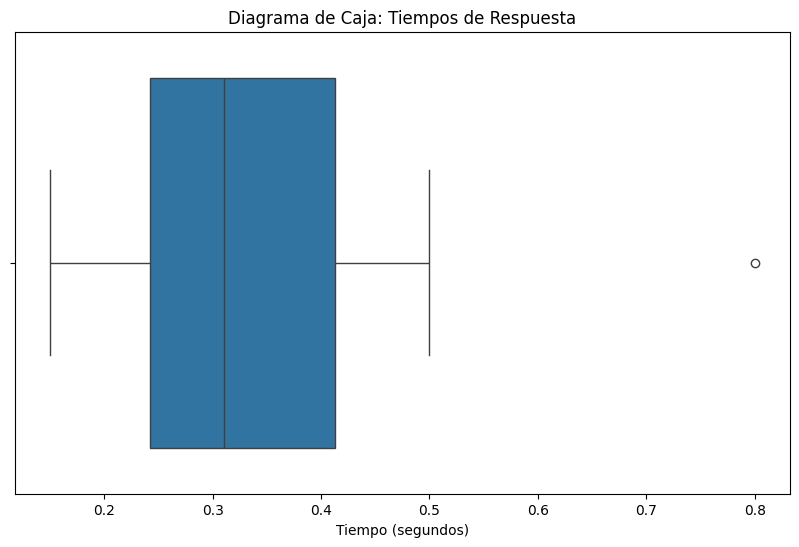


Límite inferior para outliers: -0.01
Límite superior para outliers: 0.67
Valores atípicos encontrados: [0.8]


In [32]:
# Crear diagrama de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x=tiempos)
plt.title('Diagrama de Caja: Tiempos de Respuesta')
plt.xlabel('Tiempo (segundos)')
plt.show()

# Calcular límites para valores atípicos
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

outliers = [x for x in tiempos if x > limite_superior or x < limite_inferior]
print(f"\nLímite inferior para outliers: {limite_inferior:.2f}")
print(f"Límite superior para outliers: {limite_superior:.2f}")
print(f"Valores atípicos encontrados: {outliers}")

## Aplicaciones en Machine Learning

Las medidas de posición son cruciales en ML para:

1. **Preprocesamiento de datos**:
   - Detección robusta de outliers usando IQR
   - Winsorización (recorte de valores extremos)
   - Normalización robusta usando cuantiles

2. **Análisis Exploratorio**:
   - Visualización de la distribución mediante box plots
   - Comparación de distribuciones entre diferentes grupos
   - Identificación de sesgos en los datos

3. **Evaluación de Modelos**:
   - Análisis de la distribución de errores
   - Métricas basadas en percentiles (ej: percentil 95 del error)

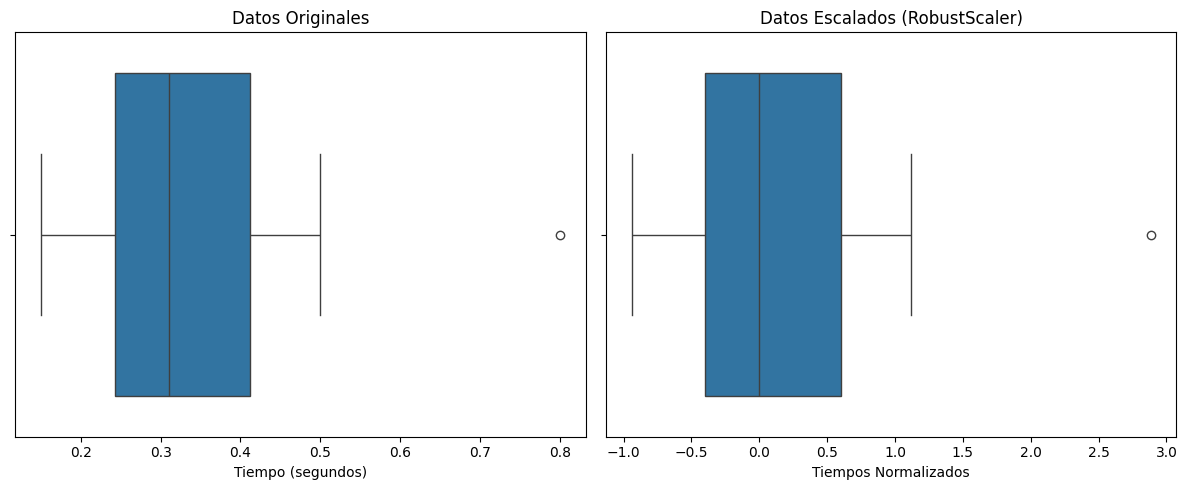

In [33]:
from sklearn.preprocessing import RobustScaler

# Ejemplo de escalado robusto usando cuartiles
robust_scaler = RobustScaler()
tiempos_scaled = robust_scaler.fit_transform(np.array(tiempos).reshape(-1, 1))

# Comparar distribuciones
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=tiempos)
plt.title('Datos Originales')
plt.xlabel('Tiempo (segundos)')

plt.subplot(1, 2, 2)
sns.boxplot(x=tiempos_scaled.flatten())
plt.title('Datos Escalados (RobustScaler)')
plt.xlabel('Tiempos Normalizados')

plt.tight_layout()
plt.show()

# 4.1.6 Medidas de Forma

Las medidas de forma nos permiten caracterizar la distribución de los datos en términos de su simetría y su grado de apuntamiento. Son especialmente importantes en machine learning para entender la distribución de nuestras variables y decidir sobre posibles transformaciones.

## Asimetría (Skewness)

La asimetría mide el grado de simetría de una distribución respecto a su media. El coeficiente de asimetría de Fisher ($g_1$) se define como:

$$g_1 = \frac{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^3}{s^3}$$

donde $s$ es la desviación estándar muestral.

### Interpretación de la asimetría:
- $g_1 = 0$: Distribución simétrica
- $g_1 > 0$: Asimetría positiva (cola derecha más larga)
- $g_1 < 0$: Asimetría negativa (cola izquierda más larga)